In [1]:
# Import Library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Data Splitting
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Cross Validation
from sklearn.model_selection import cross_val_score

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics Evaluation: Accuracy
from sklearn.metrics import accuracy_score, recall_score

## **Exercise: Metrics & Hyperparameter Tuning**

**Gunakan dataset 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'**

Carilah model dan hyperparameter terbaik
1. Lakukan EDA singkat untuk mengeksplorasi dataset terlebih dahulu.
2. Lakukan preprocessing pada features jika dibutuhkan.
3. Lakukan modeling Logistic Regression, Decision Tree, dan KNeighbors.
4. Pilih 1 model terbaik berdasarkan hasil cross validasi 3 model di atas.
5. Lakukan hyperparameter tuning pada model terpilih tsb.
6. Lakukan prediksi pada test set dari model terpilih (sebelum hyperparameter tuning).
7. Lakukan prediksi pada test set dari model dengan hyperparameter tuning.
8. Bandingkan hasil performa model sebelum dan sesudah tuning.

*Tips: Gunakan Pipeline*

**Features Description**

## **1.Load Dataset / Business Understanding**


Klasifikasi: 
- 0 : Not Fraud
- 1 : Fraud


## **Business Problem**



- FP:
    - ML memprediksi akan terjadi fraud, padahal aslinya tidak terjadi fraud.
    - Jika ML mempredikis akan terjadi padahal nyatanya tidak terjadi fraud akan mengakibatkan gangguan layanan dimana bantyak dana pelanggan akan ditahan dan laynanan tidk berjalan semestinya. dan diperlukan investigasi lanjutan untuk membuktikan apakah fraud benar2 terjdi
    - Di asumsikan cost investigasi fraud sebesar 5 juta rupiah

- FN:
    - ML memprediksi tidak akan terjadi fraud, padahal aslinya terjadi fraud.
    - jika Ml memprediksi tidak akan terjadi fraud, Padahal sebenarnya terjadi fraud. perusahaan akan mengalami kerugian yang besar karena faktanya terjadi fraud
    - Disumsikan perusahaan kehilamgan 20 juta karena terjadi fraud


Cost untuk kehilangan uang karena fraud lebih besar dibandingkan biaya investigasi untuk terjadinya frauds.
Dengan kata lain cost FN lebih besar.
Maka dari itu metric yg dipakai adalah **Recall**.

In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [11]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## **2.EDA**

In [13]:
df['Class'].value_counts() /len(df)

Class
0    0.998333
1    0.001667
Name: count, dtype: float64

In [14]:
numerik = df.select_dtypes(include= 'number')
numerik

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [58]:
df.shape

(283726, 31)

In [95]:
# List of numerical feature from DataFrame
num_feature = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

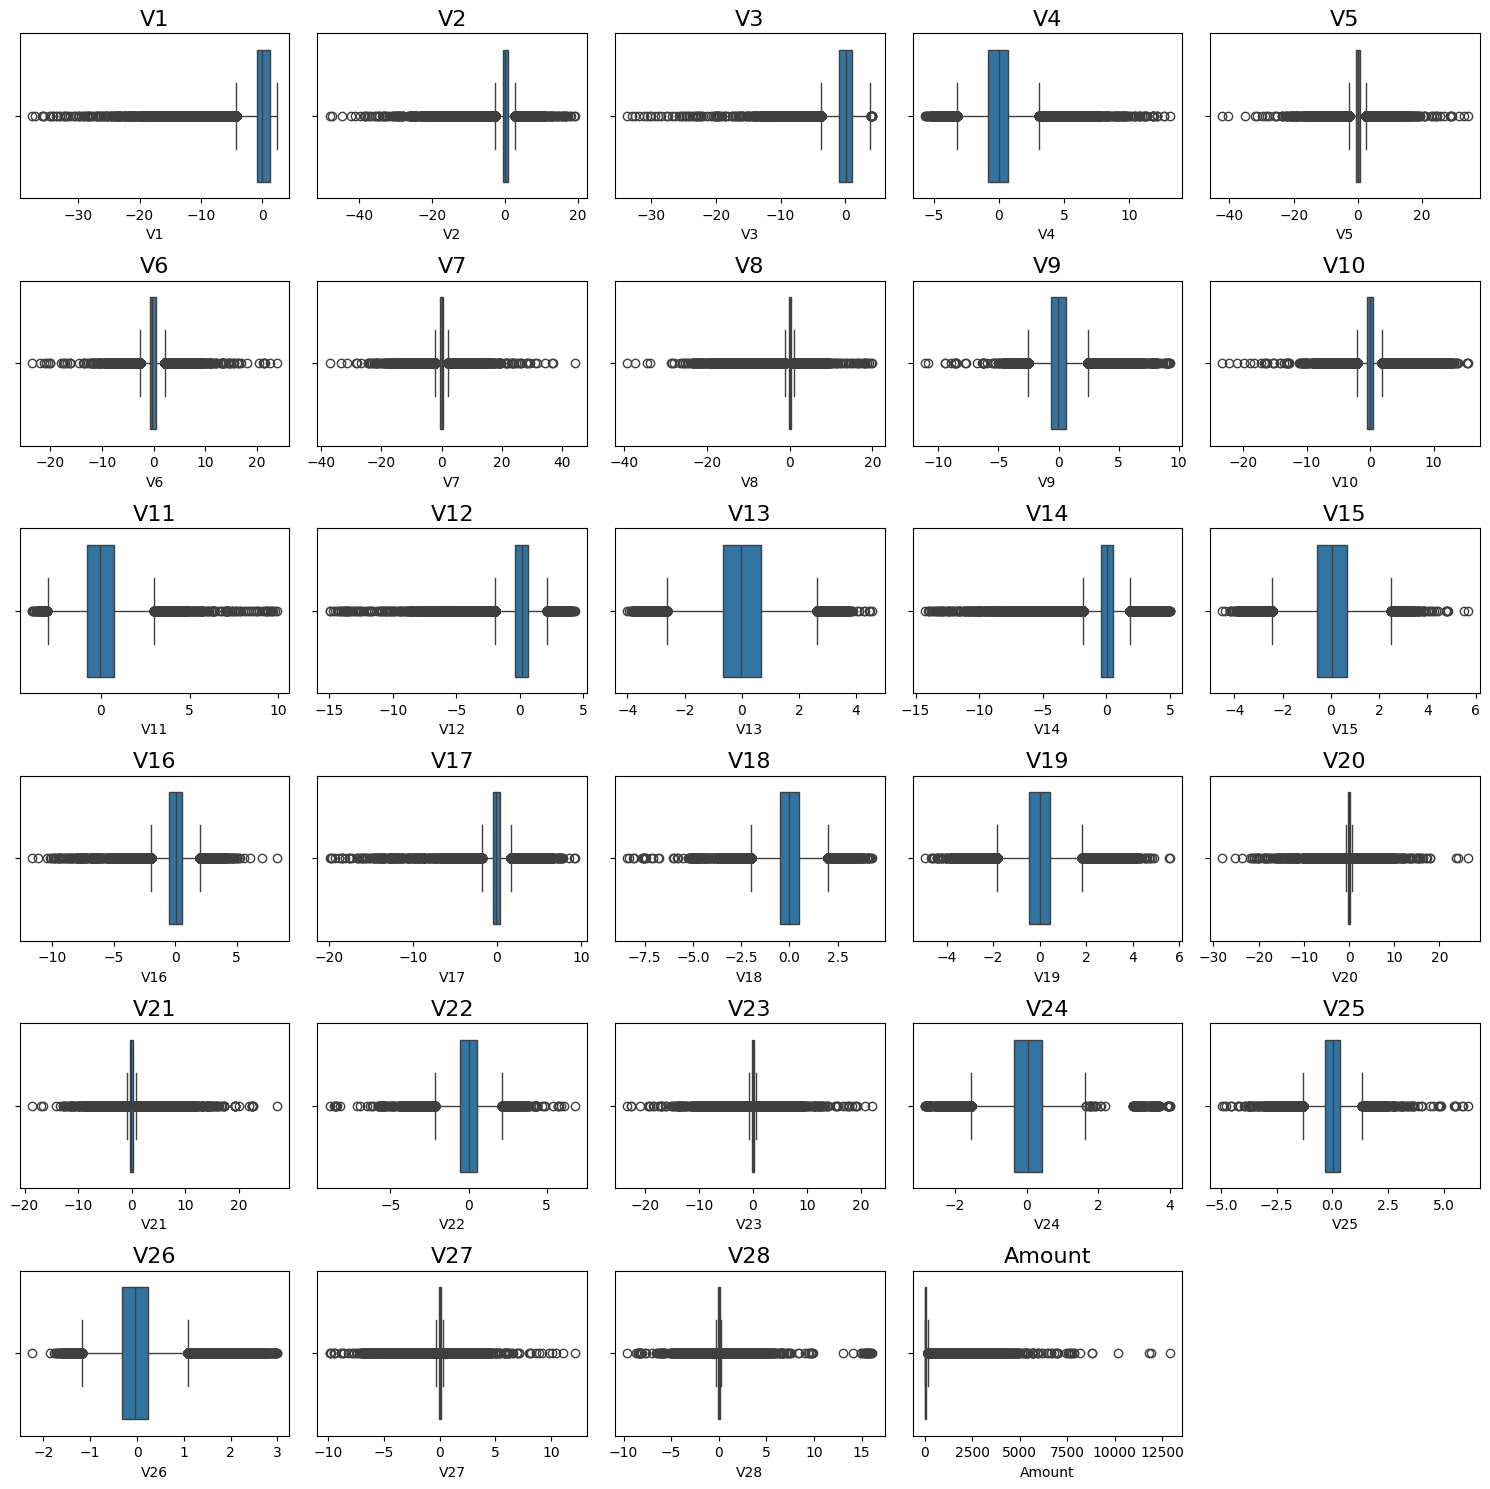

In [96]:


plt.figure(figsize=(15,15))
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(6,5, plotnumber)
    sns.boxplot(x=feature, data=df)
    plt.title(feature, fontsize= 16)
    plt.tight_layout()
    plotnumber += 1

plt.show();

In [59]:
df.drop(index=df[df['V1'] < -40].index, inplace=True)

df.drop(index=df[df['V2'] < -50].index, inplace=True)

df.drop(index=df[df['V3'] < -40].index, inplace=True)

df.drop(index=df[df['V4'] > 15].index, inplace=True)

df.drop(index=df[df['V6'] > 60].index, inplace=True)

df.drop(index=df[df['V7'] > 100].index, inplace=True)

df.drop(index=df[df['V9'] > 10].index, inplace=True)

df.drop(index=df[df['V11'] > 10].index, inplace=True)

df.drop(index=df[df['V12'] < -15].index, inplace=True)

df.drop(index=df[df['V13'] > 6].index, inplace=True)

df.drop(index=df[df['V14'] > 5].index, inplace=True)

df.drop(index=df[df['V15'] > 7.5].index, inplace=True)

df.drop(index=df[df['V16'] > 10].index, inplace=True)

df.drop(index=df[df['V17'] < -20].index, inplace=True)

df.drop(index=df[df['V19'] < -5.0].index,inplace=True)

df.drop(index=df[df['V20'] < -40].index, inplace=True)

df.drop(index=df[df['V22'] < -10].index, inplace=True)

df.drop(index=df[df['V21'] < -20].index, inplace=True)

df.drop(index=df[df['V23'] < -25].index, inplace=True)

df.drop(index=df[df['V24'] > 4].index, inplace=True)

df.drop(index=df[df['V25'] < -5].index, inplace=True)

df.drop(index=df[df['V26'] > 3].index, inplace=True)

df.drop(index=df[df['V27'] > 20].index, inplace=True)

df.drop(index=df[df['V28'] > 20].index, inplace=True)

df.drop(index=df[df['Amount'] > 15000].index, inplace=True)

In [60]:
df.shape

(283534, 31)

<Axes: xlabel='Class', ylabel='count'>

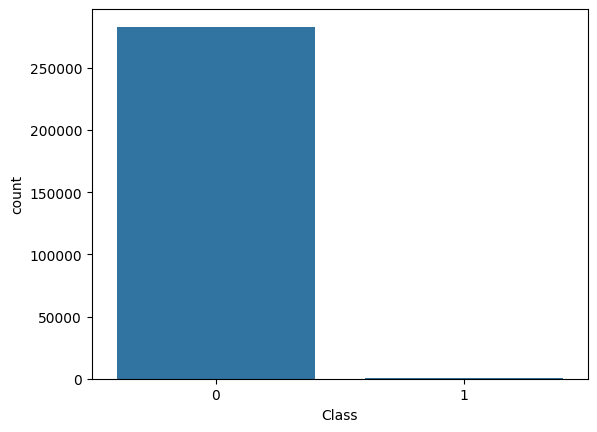

In [61]:
## Menampilkan total data masing masing cost
sns.countplot(data=df, x='Class')

In [63]:
df['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

## **3.Define X dan Y**

In [65]:
x = df.drop(columns='Class')
y = df['Class']

In [66]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [67]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283534, dtype: int64

## **4. Data Splitting**

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,
                 y,
                 test_size = 0.2,
                 random_state=0,
                 stratify=y)

## **5.Preprocessing**

Robust Scaler = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [70]:

x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [69]:
list_item = []
for col in x.columns:
    list_item.append([col,x[col].nunique(),x[col].unique()])

tabel_desc = pd.DataFrame(columns=['Nama Kolom','Jumlah Unique Value','Unique Values'],data=list_item)
tabel_desc

,Nama Kolom,Jumlah Unique Value,Unique Values
0,Time,124534,"[0.0, 1.0, 2.0, 4.0, 7.0, 9.0, 10.0, 11.0, 12...."
1,V1,275473,"[-1.3598071336738, 1.19185711131486, -1.358354..."
2,V2,275473,"[-0.0727811733098497, 0.26615071205963, -1.340..."
3,V3,275473,"[2.53634673796914, 0.16648011335321, 1.7732093..."
4,V4,275473,"[1.37815522427443, 0.448154078460911, 0.379779..."
5,V5,275473,"[-0.338320769942518, 0.0600176492822243, -0.50..."
6,V6,275473,"[0.462387777762292, -0.0823608088155687, 1.800..."
7,V7,275473,"[0.239598554061257, -0.0788029833323113, 0.791..."
8,V8,275473,"[0.0986979012610507, 0.0851016549148104, 0.247..."
9,V9,275473,"[0.363786969611213, -0.255425128109186, -1.514..."


In [71]:
transformer = ColumnTransformer([
    ('robust_scaler', RobustScaler(), ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']),
], remainder='passthrough')

In [72]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust_scaler', RobustScaler(),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount'])])

In [73]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust_scaler', RobustScaler(),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount'])])

## **6. Cross Validation**

In [74]:
from sklearn.model_selection import StratifiedKFold, KFold

In [75]:
# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

In [76]:
list_algo = [logreg, knn, tree]
list_all_acc = []
list_mean_acc = []
list_std_acc = []

for algo in list_algo:
    
    # define model
    model = algo

    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # define kfold
    fold = StratifiedKFold(n_splits=5)

    # cross validation
    crossval = cross_val_score(estimator = pipe_prep_model,   # model
                    X = x_train,
                    y = y_train,
                    cv = fold,
                    scoring = 'recall')
    
    # accuracy
    list_all_acc.append(crossval.round(2))
    list_mean_acc.append(crossval.mean())
    list_std_acc.append(crossval.std())

In [77]:
# mengecek value pada parameter scoring
from sklearn.metrics import get_scorer_names

print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc',

In [78]:
df_cv = pd.DataFrame()
df_cv['algo'] = list_algo
df_cv['all_score'] = list_all_acc
df_cv['mean_score'] = list_mean_acc
df_cv['std_score'] = list_std_acc

df_cv

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=0),"[0.54, 0.57, 0.54, 0.51, 0.6]",0.551888,0.030826
1,KNeighborsClassifier(),"[0.72, 0.66, 0.55, 0.64, 0.81]",0.676471,0.084343
2,DecisionTreeClassifier(random_state=0),"[0.76, 0.74, 0.57, 0.7, 0.81]",0.714925,0.081481


## **7.Hyperparameter Tunning**

In [79]:
# define algo
dectree = DecisionTreeClassifier()

# pipeline untuk preprocessing dan modeling
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', dectree)
])

# hyperparam
hyperparam = {
    'modeling__max_depth' : range(2, 20, 1),
    'modeling__min_samples_split': range(2, 50, 1),
    'modeling__min_samples_leaf' : range(2, 50, 1)
}

# opsi lainnya -> randomized
randomsearch = RandomizedSearchCV(
    estimator= pipe_prep_model,
    param_distributions = hyperparam,
    cv = 5,
    n_jobs = -1,
    n_iter = 50,
    scoring= 'recall'
)

In [80]:
# fitting gridsearch
randomsearch.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust_scaler',
                                                                               RobustScaler(),
                                                                               ['Time',
                                                                                'V1',
                                                                                'V2',
                                                                                'V3',
                                                                                'V4',
                                                                                'V5',
                                                                                'V6',
                                                                                'V7',
                                                                                'V8',
                                                                                'V9',
                                                                                'V10',
                                                                                'V11',
                                                                                'V12',
                                                                                'V13',
                                                                                'V14',
                                                                                'V15',
                                                                                'V16',
                                                                                'V17',
                                                                                'V18',
                                                                                'V19',
                                                                                'V20',
                                                                                'V21',
                                                                                'V22',
                                                                                'V23',
                                                                                'V24',
                                                                                'V25',
                                                                                'V26',
                                                                                'V27',
                                                                                'V28',
                                                                                'Amount'])])),
                                             ('modeling',
                                              DecisionTreeClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 20),
                                        'modeling__min_samples_leaf': range(2, 50),
                                        'modeling__min_samples_split': range(2, 50)},
                   scoring='recall')

In [81]:
randomsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('modeling',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=3))])

In [83]:
randomsearch.best_score_

0.726865671641791

In [84]:
randomsearch.best_params_

{'modeling__min_samples_split': 3,
 'modeling__min_samples_leaf': 5,
 'modeling__max_depth': 5}

# **8. Predict to Test Set**

Klasifikasi: 
- 0 : Not Fraud
- 1 : Fraud

**Sebelum dilakukan Hyperparameter Tuning**

In [85]:
# define model
model = tree

# pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fitting
pipe_prep_model.fit(x_train, y_train)

# predict
y_pred_before = pipe_prep_model.predict(x_test)

# accuracy
recall_score(y_test, y_pred_before)

0.7619047619047619

**Setelah dilakukan Hyperparameter Tuning**

In [86]:
# define model
modeling = randomsearch.best_estimator_

# fitting
modeling.fit(x_train, y_train)

# predict
y_pred_after = modeling.predict(x_test)

# accuracy
recall_score(y_test, y_pred_after)

0.8095238095238095

## **9.Confusion Metrics**

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [88]:
# confusion metrics sebelum tuning
cm_before = confusion_matrix(y_test, y_pred_before)

In [89]:
# confusion metrics setelajh tuning
cm_after = confusion_matrix(y_test, y_pred_after)

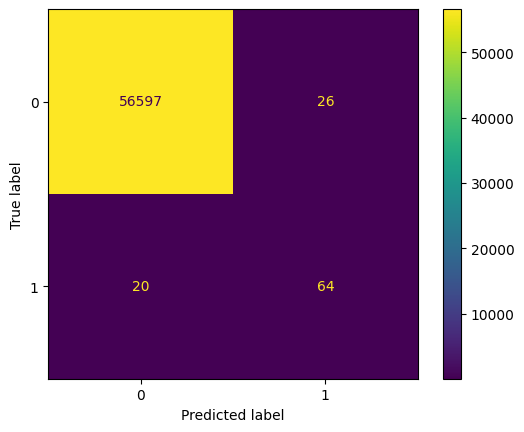

In [90]:
# visualisasi confusion metrics sebelum di tunning 
disp_b = ConfusionMatrixDisplay(confusion_matrix=cm_before)

disp_b.plot()

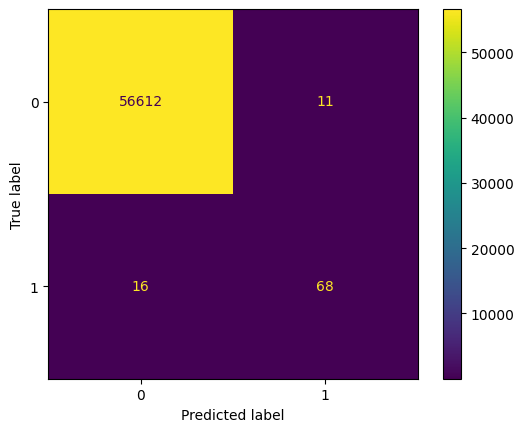

In [91]:
# visualisasi confusion metrics sebelum di tunning 
disp_a = ConfusionMatrixDisplay(confusion_matrix=cm_after)

disp_a.plot()

In [92]:
## classificatiom

print(classification_report(y_test, y_pred_before))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56623
           1       0.71      0.76      0.74        84

    accuracy                           1.00     56707
   macro avg       0.86      0.88      0.87     56707
weighted avg       1.00      1.00      1.00     56707



In [93]:
## classificatiom

print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56623
           1       0.86      0.81      0.83        84

    accuracy                           1.00     56707
   macro avg       0.93      0.90      0.92     56707
weighted avg       1.00      1.00      1.00     56707



## Kesimpulan

# Cost Before
# CB = FP * Cost + FN * Cost
CB = 26 * 1000000 + 20 * 20000000 = 426.000.000


# Cost After
# CA = FP * Cost + FN * Cost
CA = 11 * 1000000 + 16 * 20000000 = 331.000.000


hasil :
426.000.000 - 331.000.000 = 95.000.000

Perusahaan bisa menekan kerugian sebesar Rp.95.000.000 dengan melakukan 